In [ ]:
import requests
import pandas as pd
import numpy as np
import re

In [ ]:
# Makes a request to a URL and stores the response in a variable.
# Adds headers to the request to prevent getting blocked.
url=('https://www.lyrics.com/artist/Shawn-Mendes/2979091')
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
page = requests.get(url, headers=headers)

In [ ]:
page.status_code

In [ ]:
page.text[:100]

In [ ]:
# Find all links that match the pattern "/lyric/<digits>" in the page text
link=re.findall(r'/lyric/\d+',page.text)
link

In [ ]:
# Creates a URL to lyrics.com for each link in link list
url2=('https://www.lyrics.com')
song_link=[]
for i in link:
    song_link.append(url2 + i)

In [ ]:
song_link

In [ ]:
# Enumerate through song links and download their html files
import time
for i,song_name in enumerate(song_link):
    url = song_name
    header = {'User-agent': 'Mozilla/5.0 (X11; Linux i686; rv:2.0b10) Gecko/20100101 Firefox/4.0b10'}
    response = requests.get(url, header)
    time.sleep(np.random.random())
    # Write html content to a file
    with open(f'meep{i}.txt', 'w') as my_file:
        my_file.write(response.text)
    

In [ ]:
len(song_link)

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import requests
import time
import re
from bs4 import BeautifulSoup
import os

In [2]:
# Set path to working directory
path='/Users/akshayrote/Documents/spiced_Acadamy/Daily_Task/week04/webscrap-1'

# Change current working directory to specified path
os.chdir(path)

# List all files and directories in current working directory
os.listdir()

['meep132.txt',
 'meep126.txt',
 'meep16.txt',
 'meep318.txt',
 'meep330.txt',
 'meep324.txt',
 'meep278.txt',
 'meep244.txt',
 'meep250.txt',
 'meep287.txt',
 'meep293.txt',
 'meep292.txt',
 'meep286.txt',
 'meep251.txt',
 'meep245.txt',
 'meep279.txt',
 'meep325.txt',
 'meep331.txt',
 'meep319.txt',
 'meep17.txt',
 'meep127.txt',
 'meep133.txt',
 'meep119.txt',
 'meep125.txt',
 'meep131.txt',
 'meep29.txt',
 'meep15.txt',
 'meep327.txt',
 'meep333.txt',
 'meep253.txt',
 'meep247.txt',
 'meep290.txt',
 'meep284.txt',
 'meep285.txt',
 'meep291.txt',
 'meep246.txt',
 'meep252.txt',
 'meep332.txt',
 'meep326.txt',
 'meep14.txt',
 'meep28.txt',
 'meep130.txt',
 'meep124.txt',
 'meep118.txt',
 'meep120.txt',
 'meep134.txt',
 'meep108.txt',
 'meep10.txt',
 'meep38.txt',
 'meep322.txt',
 'meep336.txt',
 'meep256.txt',
 'meep242.txt',
 'meep295.txt',
 'meep281.txt',
 '.DS_Store',
 'meep280.txt',
 'meep294.txt',
 'meep243.txt',
 'meep257.txt',
 'meep337.txt',
 'meep323.txt',
 'meep39.txt',
 'm

In [3]:
#Extracting lyrics from file for artist2 (shawn mendas)

#create an empty dictionary to store song lyrics and titles
song_lyric_art1={}

# iterate through all files in directory and read in files ending in '.txt'
for i,name in enumerate(os.listdir()):
    if name.endswith('.txt'):
         # read in file text
        with open(name,'r') as file_in:
            song_data=file_in.read()
            # parse file content as html using BeautifulSoup
            parsed_content=BeautifulSoup(markup=song_data,features='html.parser')
            # find the song title and lyrics and store in dictionary
            song_title=(parsed_content.find(name='hgroup',attrs={'dir':'ltr'}))
            lyric=(parsed_content.find(name='pre',attrs={'id':"lyric-body-text"}))
            
            if song_title and lyric :
                song_lyric_art1[song_title.find(name='h1').get_text()]=lyric.get_text()

In [5]:
#song_lyric_art1.keys()
len(song_lyric_art1)

106

In [6]:
#Extracting lyrics from file for artist2 (ED SHEERAN)
path='/Users/akshayrote/Documents/spiced_Acadamy/Daily_Task/week04/Ed Sheeran'
os.chdir(path)
os.listdir()

song_lyric_art2={}

for i,name in enumerate(os.listdir()):
    if name.endswith('.txt'):
        with open(name,'r') as file_in:
            song_data=file_in.read()
            parsed_content=BeautifulSoup(markup=song_data,features='html.parser')
            song_title=(parsed_content.find(name='hgroup',attrs={'dir':'ltr'}))
            lyric=(parsed_content.find(name='pre',attrs={'id':"lyric-body-text"}))
            
            if song_title and lyric :
                song_lyric_art2[song_title.find(name='h1').get_text()]=lyric.get_text()


In [7]:
song_lyric_art2
len(song_lyric_art2)

217

### Combining both dictionary to create x_train 

In [8]:
#creating dataframe of lyrics for Edsheeran & assingned y=0 
d={'lyrics':song_lyric_art2.values(),'y':[0]*217}
df1=pd.DataFrame(data=d)

In [9]:
df1

,lyrics,y
0,If we take this bird in\nWith its broken leg\n...,0
1,When your legs don't work like they used to be...,0
2,"Ba-da-boom, ba-da-bing\nYou done knocked me ri...",0
3,"Now I'm in town, break it down, thinking of ma...",0
4,She's like cold coffee in the morning\nI'm dru...,0
...,...,...
212,I wanna be drunk when I wake up\nOn the right ...,0
213,Of all the money that e'er I had \nI spent it ...,0
214,"(One, two)\n\nStop the clocks, it's amazing\nY...",0
215,It's just another night\nAnd I'm staring at th...,0


In [10]:
#creating dataframe of lyrics for shawn Mendas & assingned y=1
d={'lyrics':song_lyric_art1.values(),'y':[1]*106}
df2=pd.DataFrame(data=d)

In [11]:
df2

,lyrics,y
0,I promise that one day I'll be around\nI'll ke...,1
1,I saw you on a Sunday in a café\nAnd all you d...,1
2,All it'd take is 24 hours\nSign the check and ...,1
3,"How are you guys tonight, good\nAlright, clap ...",1
4,You've got a hold of me\nDon't even know your ...,1
...,...,...
101,It's a fairytale I can't explain\nFull of word...,1
102,"Here I am, stuck on this couch\nScrolling thro...",1
103,I wanna follow her where she goes\nI think abo...,1
104,"I want you close to me\nI want you close, I wa...",1


In [12]:
#while concatinating two data frame use ignore_index to avoid duplicate index
df=pd.concat([df1,df2],ignore_index=True)

In [13]:
#final dataframe for artist1+artist2
df

,lyrics,y
0,If we take this bird in\nWith its broken leg\n...,0
1,When your legs don't work like they used to be...,0
2,"Ba-da-boom, ba-da-bing\nYou done knocked me ri...",0
3,"Now I'm in town, break it down, thinking of ma...",0
4,She's like cold coffee in the morning\nI'm dru...,0
...,...,...
318,It's a fairytale I can't explain\nFull of word...,1
319,"Here I am, stuck on this couch\nScrolling thro...",1
320,I wanna follow her where she goes\nI think abo...,1
321,"I want you close to me\nI want you close, I wa...",1


In [14]:
a=df.head(10)

In [15]:
b=df.tail(6)

In [16]:
# x_test is few lyrics kept aside for testing model

x_test=pd.concat([a,b],ignore_index=True) 
x_test

,lyrics,y
0,If we take this bird in\nWith its broken leg\n...,0
1,When your legs don't work like they used to be...,0
2,"Ba-da-boom, ba-da-bing\nYou done knocked me ri...",0
3,"Now I'm in town, break it down, thinking of ma...",0
4,She's like cold coffee in the morning\nI'm dru...,0
5,Settle down with me\nCover me up\nCuddle me in...,0
6,I should ink my skin \nWith your name \nAnd t...,0
7,"She got the, mm, brown eyes, caramel thighs\nL...",0
8,I'm gonna pick up the pieces\nAnd build a Lego...,0
9,"You were just a small bump unborn, four months...",0


In [17]:
df.shape

(323, 2)

In [18]:
x_test.shape

(16, 2)

In [19]:
df.drop(df.head(10).index,inplace=True)

In [20]:
df.drop(df.tail(6).index,inplace=True)

In [21]:
df    #final x_train dataset after dropping few lyrics from it

,lyrics,y
10,Things were all good yesterday\nAnd then the d...,0
11,Tell me that you'll turned down the man\nWho a...,0
12,Oh-oh-oh-oh\nOh-oh-oh-oh\nOh-oh-oh-oh\nOh-oh-o...,0
13,I can see the city life\nFrom where I stand on...,0
14,"White lips, pale face\nBreathing in snowflakes...",0
...,...,...
312,"Help me, it's like the walls are caving in\nSo...",1
313,All it'd take is one flight\nWe'd be in the sa...,1
314,"I believe, I believe, I believe, hey\nI believ...",1
315,It's hard to believe you don't remember me at ...,1


## Sklearn Countvectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [23]:
#defining i/p & o/p for model
y_train=df['y']
x_train=df['lyrics']

In [24]:
x_train

10     Things were all good yesterday\nAnd then the d...
11     Tell me that you'll turned down the man\nWho a...
12     Oh-oh-oh-oh\nOh-oh-oh-oh\nOh-oh-oh-oh\nOh-oh-o...
13     I can see the city life\nFrom where I stand on...
14     White lips, pale face\nBreathing in snowflakes...
                             ...                        
312    Help me, it's like the walls are caving in\nSo...
313    All it'd take is one flight\nWe'd be in the sa...
314    I believe, I believe, I believe, hey\nI believ...
315    It's hard to believe you don't remember me at ...
316    Don't cry, or do whatever makes you feel comfo...
Name: lyrics, Length: 307, dtype: object

In [25]:
# Vectorizes the count of words in the train data using CountVectorizer
vectorizer= CountVectorizer(lowercase=True,stop_words='english',token_pattern='[A-za-z]+',ngram_range=(1,1))
# transforms the train data into the count of words
x_train_tran=vectorizer.fit_transform(x_train)
# converts the transformed data into a DataFrame with columns as the unique feature names
x_train_cv=pd.DataFrame(x_train_tran.toarray(),columns=vectorizer.get_feature_names_out())
x_train_cv.head()

,[,[chorus],[x,],abit,able,abort,abrantee,absence,absinthe,...,youu,yuh,yuletide,yup,z,zales,zion,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
log_reg=LogisticRegression(max_iter=200)

In [27]:
log_reg.fit(x_train_cv,y_train)

LogisticRegression(max_iter=200)

In [28]:
log_reg.score(x_train_cv,y_train)

1.0

In [29]:
x_test1=x_test['lyrics']
y_test1=x_test['y']
x_test_tra=vectorizer.transform(x_test1)
x_test_cv=pd.DataFrame(x_test_tra.toarray(),columns=vectorizer.get_feature_names_out())

In [30]:
x_test_cv

,[,[chorus],[x,],abit,able,abort,abrantee,absence,absinthe,...,youu,yuh,yuletide,yup,z,zales,zion,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
log_reg.predict(x_test_cv)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [32]:
log_reg.score(x_test_cv,y_test1)

0.9375

## Tfidf Vectorizer

In [33]:
tfidf=TfidfVectorizer(lowercase=True,stop_words='english',token_pattern='[A-Za-z]+',ngram_range=(1,1))
x_tf=tfidf.fit_transform(x_train)
df_tf=pd.DataFrame(x_tf.toarray(),columns=tfidf.get_feature_names_out())

In [34]:
df_tf

,abit,able,abort,abrantee,absence,absinthe,ac,acabar,acapella,accept,...,youu,yuh,yuletide,yup,z,zales,zion,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055095,0.0,0.0
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [35]:
x_test2=tfidf.transform(x_test1)
df_test=pd.DataFrame(x_test2.toarray(),columns=tfidf.get_feature_names_out())

In [36]:
df_test

,abit,able,abort,abrantee,absence,absinthe,ac,acabar,acapella,accept,...,youu,yuh,yuletide,yup,z,zales,zion,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.03801,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
log_tfidf=LogisticRegression()

In [38]:
log_tfidf.fit(df_tf,y_train)

LogisticRegression()

In [39]:
log_tfidf.score(df_tf,y_train)

0.8957654723127035

In [40]:
log_tfidf.predict(df_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [41]:
log_tfidf.score(df_test,y_test1)

0.6875

## Feature selection

In [42]:
skb_manual=SelectKBest(f_classif,k=10)  #Anova
skb_cv=SelectKBest(f_classif,k=10)
skb_tfidf=SelectKBest(f_classif,k=10)

In [43]:
skb_cv.fit(x_train_cv,y_train)
skb_tfidf.fit(df_tf,y_train)

SelectKBest()

In [44]:
features_cv = sorted(zip(skb_cv.scores_, skb_cv.get_feature_names_out()), reverse=True)
features_tfidf = sorted(zip(skb_tfidf.scores_, skb_tfidf.get_feature_names_out()), reverse=True)

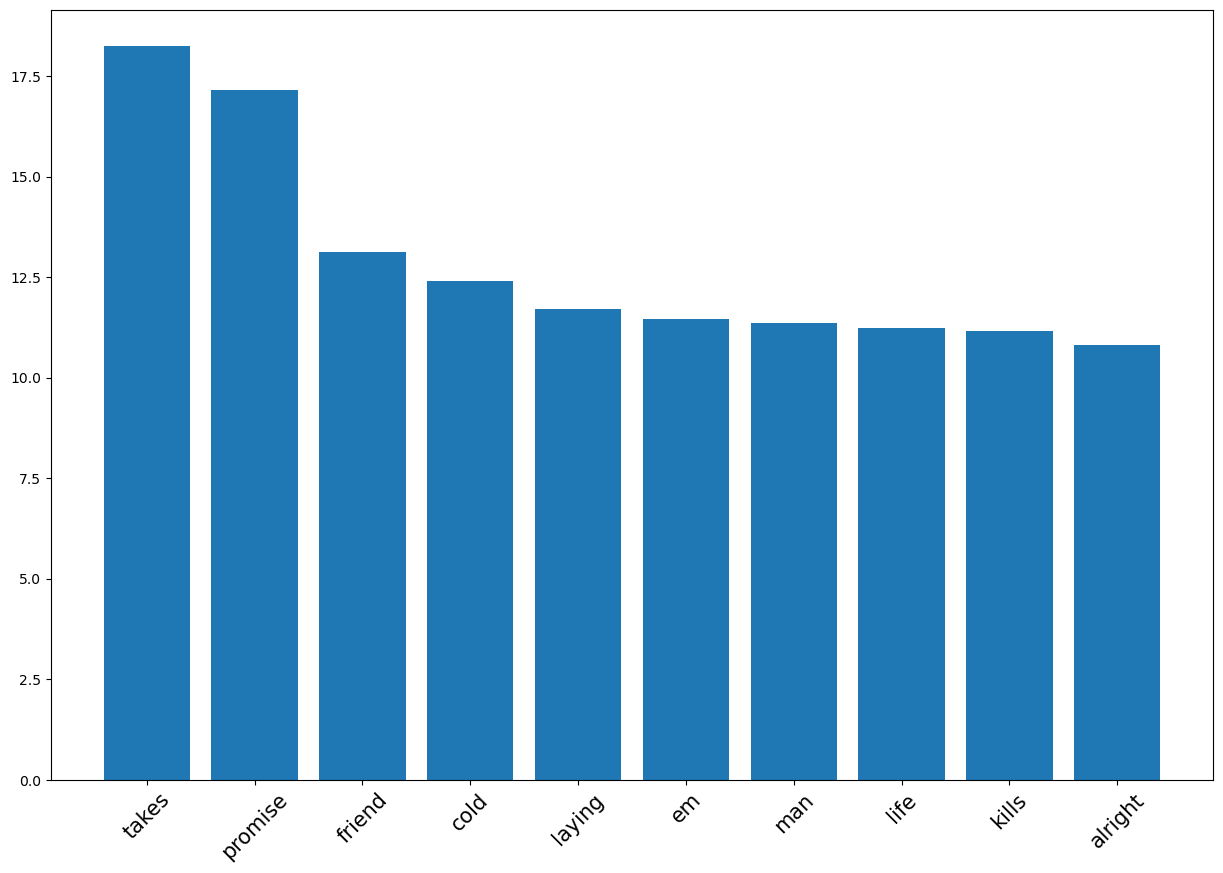

In [45]:
plt.figure(figsize=(15,10))
plt.bar(x=list(range(10)), height=sorted(skb_cv.scores_, reverse=True)[:10])
plt.xticks(list(range(10)), [feat[1] for feat in features_cv][:10], rotation=45, fontsize=15);

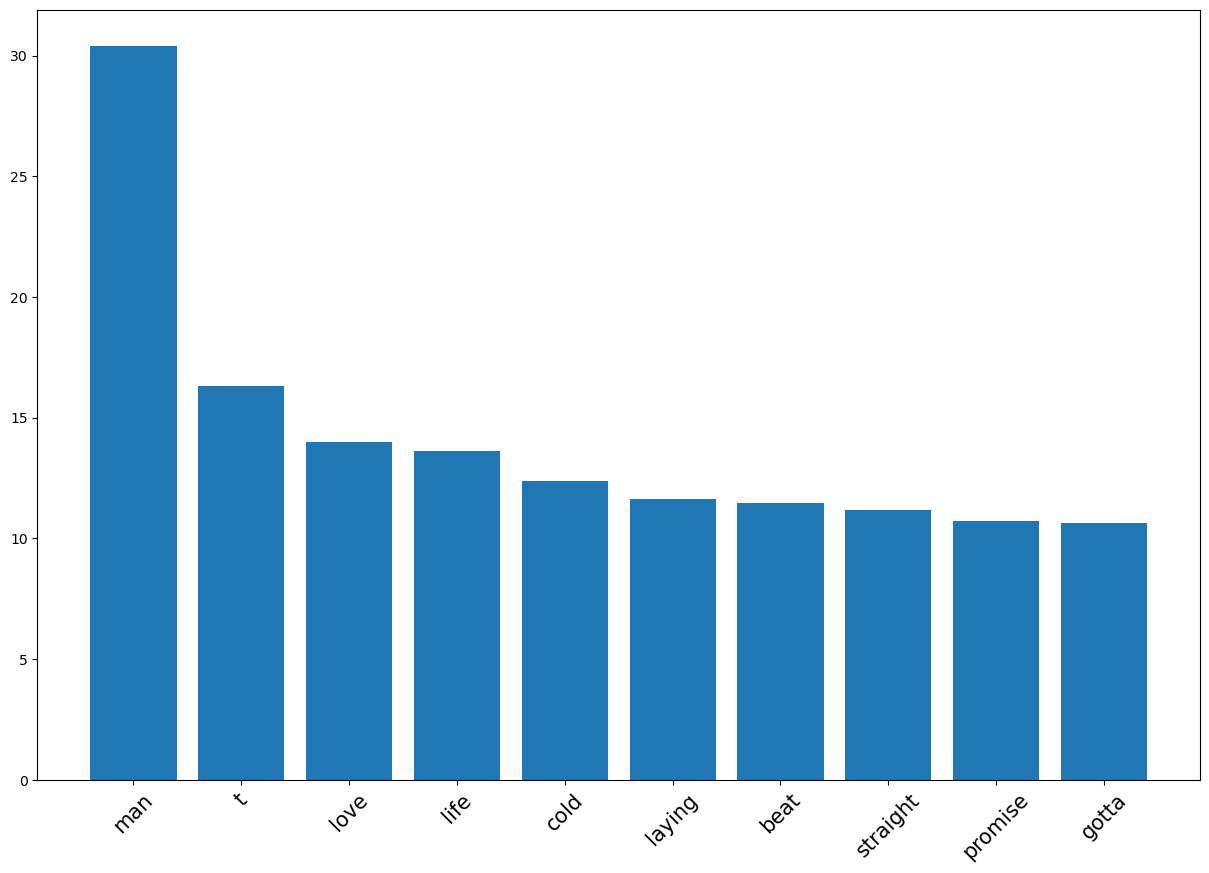

In [46]:
plt.figure(figsize=(15,10))
plt.bar(x=list(range(10)), height=sorted(skb_tfidf.scores_, reverse=True)[:10])
plt.xticks(list(range(10)), [feat[1] for feat in features_tfidf][:10], rotation=45, fontsize=15);

In [49]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [59]:
x_train

10     Things were all good yesterday\nAnd then the d...
11     Tell me that you'll turned down the man\nWho a...
12     Oh-oh-oh-oh\nOh-oh-oh-oh\nOh-oh-oh-oh\nOh-oh-o...
13     I can see the city life\nFrom where I stand on...
14     White lips, pale face\nBreathing in snowflakes...
                             ...                        
312    Help me, it's like the walls are caving in\nSo...
313    All it'd take is one flight\nWe'd be in the sa...
314    I believe, I believe, I believe, hey\nI believ...
315    It's hard to believe you don't remember me at ...
316    Don't cry, or do whatever makes you feel comfo...
Name: lyrics, Length: 307, dtype: object

In [67]:
lyrics=[]
lyrics=song_lyric_art1.values()
type(lyrics)

dict_values

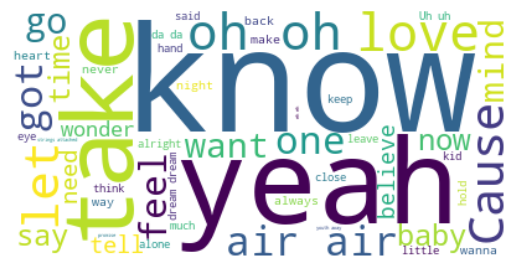

In [70]:
text=''.join(lyrics)
wordcloud = WordCloud(background_color="white",max_words=50,contour_color="steelblue").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()